# Linear Regression

<img src="figures/iterative-regression.gif" width="50%">

* ``Linear regression`` models are a good **starting point** for **regression** tasks.
* It is the **simplest form of regression**.  
* We model our system with a **linear combination of features** to produce one output.  

* Such models are popular because they can be **fit very quickly**, and are **very interpretable**.

You are probably familiar with the **simplest form** of a linear regression model (i.e., fitting a straight line to data) but **such models can be extended** to model more complicated data behavior.

### Interesting application of linear regression
* **[stock trading](https://www.quandl.com/databases/WIKIP)**: stock prices, dividends and splits for 3000 US publicly-traded companies.
* **[astronomy](https://sdo.gsfc.nasa.gov/data/dataaccess.php)**
* **[sports betting](http://opensourcesports.com/)**
* **[flight time prediction](https://www.firebase.com/docs/open-data/airports.html)**: airports delays

We begin with the standard imports:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

## Simple Linear Regression

We will start with the **most familiar linear regression**, a straight-line fit to data.
A straight-line fit is a model of the form

$$
y = ax + b
$$

where $a$ is commonly known as the <span style="color:blue">slope</span>, and $b$ is commonly known as the <span style="color:blue">intercept</span>.


### Example
Consider the following data, which is scattered about a line $y=2x-5$ with a slope of 2 and an intercept of -5:

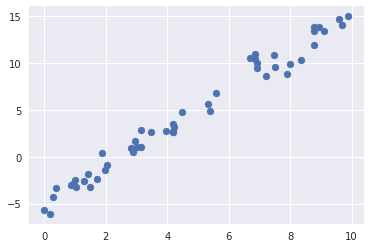

In [2]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

### Train a LinearRegression model
We can use Scikit-Learn's ``LinearRegression`` estimator to fit this data and **construct the best-fit line**:

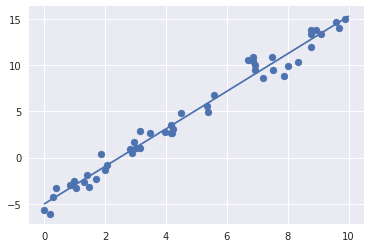

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, num=1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

### Read learned parameters
The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore.

Here the relevant parameters are ``coef_`` and ``intercept_``:

In [4]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.0272088103606944
Model intercept: -4.9985770855532


We see that the results are very close to the inputs, as we might hope.

### Multidimensional
The ``LinearRegression`` estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle **multidimensional linear models** of the form
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$

where there are multiple $x$ values. 
Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions.


### Multidimensional data using Numpy
The multidimensional nature of such regressions makes them more difficult to visualize, but we can see one of these fits in action by building some example data, using NumPy's matrix multiplication operator:

In [5]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3) # 100 rows, 3 columns
y = 0.5 + np.dot(X, [1.5, -2., 1.]) # Dot product: 100 rows

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.50000000000001
[ 1.5 -2.   1. ]


Here the $y$ data is constructed from three random $x$ values, and ``the linear regression recovers the coefficients used to construct the data``.

$$ y = 0.5 + 1.5 x_1 - 2 x_2 + 1 x_3$$

In this way, we can use the single ``LinearRegression`` estimator to fit lines, planes, or hyperplanes to our data.
It still appears that this approach would be limited to strictly **linear relationships between variables**, but it turns out **we can relax this** as well.

## Regression vs Classification
<img align="left" style="padding-right:30px;"  src="figures/regression-vs-classification.png" width="30%">

* **Linear regression** when output is binary $y \in \{0, 1\}$  
  * $h(w, x) = w_0 + w_1 x$
  
  
* **Linear Classification**
  * Used with discrete output values
  * Threshold a linear function <br>
    $h(w, x) = 1$ when $w_0 + w_1 x \geq 0$ <br>
    $h(w, x) = 0$ when $w_0 + w_1 x < 0$
  * Activation function $g$

### Linear Regression vs Neural Network

A Neural Network **without Activation function** would simply be a Linear regression Model


<img src="figures/neuron.gif" width="50%">


## Learning Weights

There are two ways to adjust the weights of a linear model (which includes linear models with nonlinear features):  
**Normal equations** (analytical solution)
* Requires inversion of $m \times n$ matrix.
* It does not scale well with the number of features.

**Gradient descent** (iterative solution)
* Requires the calculation of $m$ gradients in each step.
* It does not scale well with the number of examples.

In addition, we can add a constraint to the objective function to penalize large weights: **Tikhonov regularization** (forward pointer).

## Normal Equations

Solving $\vec{X} \cdot \vec{w} = \vec{y}$ means solving
$$
\left\{
\begin{array}{rcrcl}
x^{(1)}_1 w_1 & + x^{(1)}_2 w_2 & + \cdots & + x^{(1)}_n w_n & = y^{(1)} \\
x^{(2)}_1 w_1 & + x^{(2)}_2 w_2 & + \cdots & + x^{(2)}_n w_n & = y^{(2)} \\
x^{(3)}_1 w_1 & + x^{(3)}_2 w_2 & + \cdots & + x^{(3)}_n w_n & = y^{(3)} \\
      \vdots  &          \vdots &   \ddots &          \vdots & = \vdots \\
x^{(m)}_1 w_1 & + x^{(m)}_2 w_2 & + \cdots & + x^{(m)}_n w_n & = y^{(m)}
\end{array}
\right.\,.
$$

* Frequently, solving equation $\vec{X} \cdot \vec{w} = \vec{y}$ directly for $\vec{w}$ by **inversion is not possible**.
* As $\vec{X}$ is not necessarily a square matrix, therefore $\vec{w} = \vec{X}^{-1} \vec{y}$ is usually not possible.
* This implies that it is usually **impossible to find an exact solution**.
* These systems are [overdetermined](https://en.wikipedia.org/wiki/Overdetermined_system).

### Note: Overdetermined System 

A system of equations is considered overdetermined if there are **more equations than unknowns**. 
* An overdetermined system is almost always inconsistent (it has no solution) when constructed with random coefficients. 
* However, an overdetermined system will have solutions in some cases, for example if some equation occurs several times in the system, or if some equations are linear combinations of the others.

### Theorem: linear least squares solution

Let $X$  be an $m\times n$  matrix and let  $\vec{y}$  be a vector in $R^m$.  
The **least-squares solutions** of $X\hat{\vec{w}}=\vec{y}$ are the solutions of the matrix equation
$$X^TX\hat{\vec{w}} = X^T\vec{y}$$  

for $\hat{\vec{w}}$, i.e.,

$$\hat{\vec{w}} = (X^\intercal X)^{-1}X^\intercal\vec{y}.$$

### Inverse of a non-square matrices
* The expression $(X^\intercal X)^{-1}X^\intercal$ is equivalent to the [Moore-Penrose pseudoinverse](http://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_pseudoinverse) $X^+$ of $X$. <br>
* It is a **generalization** of the **inverse** for **non-square matrices**. <br>
* You can use this to implement normal equations if your library provides the function. <br>
* You could also use a least squares solver (e.g. `numpy.linalg.lstsq`).

### [Inversion of 2x2 matrices](https://en.wikipedia.org/wiki/Invertible_matrix#Inversion_of_2.C3.972_matrices)

$$\left(\begin{array}{cc}a & b\\ c & d\end{array}\right)^{-1} = \frac{1}{ad - bc}\left(\begin{array}{cc}d & -b\\ -c & a\end{array}\right)$$

### Linear least squares
* This approach is called linear least squares since the assumed **function is linear in the parameters to be estimated**. 
* Linear least squares problems are **convex** and have a closed-form **solution** that is **unique**, provided that `the number of data points used for fitting equals or exceeds the number of unknown parameters`, except in special degenerate situations.  

See https://en.wikipedia.org/wiki/Linear_least_squares_(mathematics) for more details.

### Non linear least squares
* In contrast, non-linear least squares problems generally **must be solved** by an **iterative** procedure, and the problems can be **non-convex** with multiple optima for the objective function. 
* If prior distributions are available, then even an underdetermined system can be solved using the Bayesian MMSE estimator.

### Analitic solutions using Numpy

In [6]:
def normal_equations(X, y):
    # w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    # ... or we can use the Moore-Penrose pseudoinverse (is usually more likely to 
    # be numerically stable)
    w = np.linalg.pinv(X).dot(y)
    # ... or we use the solver
    # w = np.linalg.lstsq(X, y)[0]
    return w

# Scikit-Learn
* [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) fits a linear model with coefficients $\vec{w}=w_1,\dots , w_n$ to minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation. Mathematically it solves a problem of the form: $$\min_w \|Xw - y\|_2^2$$
* [LogisticRegression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression), despite its name, is a linear model **for classification** rather than regression.

## Basis Function Regression

* Given a supervised learning problem of using $n$ inputs $(x_1, x_2, ..., x_n)$ to predict a **continuous target** $Y$, the simplest model to use would be `linear regression`. 

* What if we know that the relationship between the inputs and the target is **non-linear**, but we are unsure of exactly what form this relationship has?

* One way to overcome this problem is to use **linear basis function** models.   
* These models assume that the target is a linear combination of a set of $n+1$ basis functions.
$$
Y_i = w_0 + w_1 f_1(x_1) + w_2 f_2(x_2) + ... + w_n f_n(x_n)
$$

### Example
if $f_n(x) = x^n$, our model becomes a **polynomial regression**:
$$
y = w_0 + w_1 x + w_2 x^2 + w_3 x^3 + \cdots
$$
* Notice that this is **still a linear model**
* the linearity refers to the fact that the coefficients $w_n$ never multiply or divide each other.

What we have effectively done is taken our **one-dimensional** $x$ values and **projected** them **into a higher dimension**, so that a linear fit can fit more complicated relationships between $x$ and $y$.


###  Scikit-Learn: Polynomial basis functions

This polynomial projection is useful enough that it is built into Scikit-Learn, using the ``PolynomialFeatures`` transformer.
* Given $(x)$ and fixing the `degree = 3`, the polynomial projection is
$$(x^0,x^1,x^2,x^3)$$
* Given $(x_1, x_2, x_3)=(2, 3, 4)$ and fixing the `degree = 2`, the polynomial projection is
$$\left(\begin{array}{ccc}
  x_1^0 & x_1^1 & x_1^2\\ 
  x_2^0 & x_2^1 & x_2^2 \\ 
  x_3^0 & x_3^1 & x_3^2\end{array}\right) = \left(\begin{array}{ccc}
  1 & 2 & 4\\ 
  1 & 3 & 9 \\ 
  1 & 4 & 16\end{array}\right)$$

In [7]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(2)
poly.fit_transform(x.reshape(-1, 1))

array([[ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.]])

We see here that the transformer has converted our one-dimensional array into a three-dimensional array by taking the exponent of each value.
* This new, **higher-dimensional data** representation can then be **plugged into a linear regression**.
* The cleanest way to accomplish this is to **use a pipeline**.

In [8]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

With this transform in place, we can use the linear model to fit much more complicated relationships between $x$ and $y$.

### Example

Here is a sine wave with noise:

[4.17022005e+00 7.20324493e+00 1.14374817e-03 3.02332573e+00
 1.46755891e+00 9.23385948e-01 1.86260211e+00 3.45560727e+00
 3.96767474e+00 5.38816734e+00 4.19194514e+00 6.85219500e+00
 2.04452250e+00 8.78117436e+00 2.73875932e-01 6.70467510e+00
 4.17304802e+00 5.58689828e+00 1.40386939e+00 1.98101489e+00
 8.00744569e+00 9.68261576e+00 3.13424178e+00 6.92322616e+00
 8.76389152e+00 8.94606664e+00 8.50442114e-01 3.90547832e-01
 1.69830420e+00 8.78142503e+00 9.83468338e-01 4.21107625e+00
 9.57889530e+00 5.33165285e+00 6.91877114e+00 3.15515631e+00
 6.86500928e+00 8.34625672e+00 1.82882773e-01 7.50144315e+00
 9.88861089e+00 7.48165654e+00 2.80443992e+00 7.89279328e+00
 1.03226007e+00 4.47893526e+00 9.08595503e+00 2.93614148e+00
 2.87775339e+00 1.30028572e+00]
[[4.17022005e+00]
 [7.20324493e+00]
 [1.14374817e-03]
 [3.02332573e+00]
 [1.46755891e+00]
 [9.23385948e-01]
 [1.86260211e+00]
 [3.45560727e+00]
 [3.96767474e+00]
 [5.38816734e+00]
 [4.19194514e+00]
 [6.85219500e+00]
 [2.04452250e+00]
 [

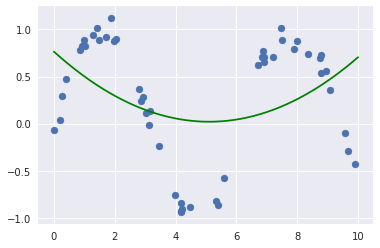

In [159]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
print(x)
print(x[:, np.newaxis])
poly_model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, num=1000)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, color='green');

`Our linear model, through the use of 7th-order polynomial basis functions`, 
* `can provide an excellent fit to this non-linear data!`

<div class="alert alert-success">
    
## Practice 
* compare the 7th-degree polynomial model with the following degrees 3th, 5th, 9th and with a simple LinearRegression model
* plot these models on a new figure similar to the previous but using different colors

</div>

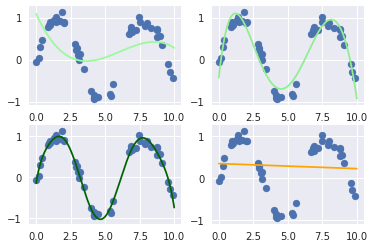

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

x = np.array([2, 3, 4])
poly = PolynomialFeatures(2)
poly.fit_transform(x.reshape(-1, 1))


poly_model_3 = make_pipeline(PolynomialFeatures(3),
                           LinearRegression())

poly_model_5 = make_pipeline(PolynomialFeatures(5),
                           LinearRegression())

poly_model_9 = make_pipeline(PolynomialFeatures(9),
                           LinearRegression())

linear_model = LinearRegression()

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

xfit = np.linspace(0, 10, num=1000)

poly_model_3.fit(x[:, np.newaxis], y)
yfit3 = poly_model_3.predict(xfit[:, np.newaxis])

poly_model_5.fit(x[:, np.newaxis], y)
yfit5 = poly_model_5.predict(xfit[:, np.newaxis])

poly_model_9.fit(x[:, np.newaxis], y)
yfit9 = poly_model_9.predict(xfit[:, np.newaxis])

linear_model.fit(x[:, np.newaxis], y)
yfitL = linear_model.predict(xfit[:, np.newaxis])

fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0,0].scatter(x, y)
axes[0,0].plot(xfit, yfit3, color='palegreen');
axes[0,1].scatter(x, y)
axes[0,1].plot(xfit, yfit5, color='lightgreen');
axes[1,0].scatter(x, y)
axes[1,0].plot(xfit, yfit9, color='darkgreen');
axes[1,1].scatter(x, y)
axes[1,1].plot(xfit, yfitL, color='orange');




### Gaussian basis functions

<img align="left" style="padding-right:30px;"  src="figures/05.06-gaussian-basis.png" width="40%">  
A **model** that 
* is not a sum of polynomial bases, 
* but a **sum of Gaussian bases**.


The **shaded regions** in the plot are the scaled basis functions, and when added together they **reproduce the smooth curve** through the data.

These Gaussian basis functions are **not built into Scikit-Learn**, but we can write a custom transformer that will create them, as shown here and illustrated in the following figure (Scikit-Learn transformers are implemented as Python classes;   
reading Scikit-Learn's source is a good way to see how they can be created):

In [157]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, center, width, axis=None):
        arg = (x - center) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
    

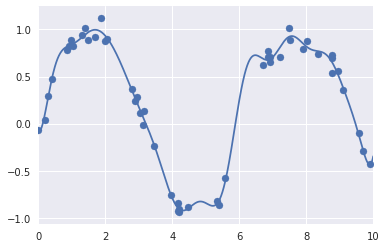

In [160]:
gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

We put this example here just to make clear that there is nothing magic about polynomial basis functions: if you have some sort of intuition into the generating process of your data that makes you think one basis or another might be appropriate, you can use them as well.

## Regularization

The introduction of **basis functions** into our linear regression makes the model 
* much **more flexible**, but 
* it also can very quickly lead to **over-fitting**.

For example, if we choose too many Gaussian basis functions, we end up with results that don't look so good:

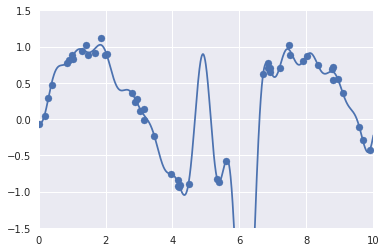

In [162]:
model = make_pipeline(GaussianFeatures(30),
                      LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

With the data projected to the **30-dimensional basis**, the model has far **too much flexibility** and goes to extreme values between locations where it is constrained by data.

We can see the reason for this if we ``plot the coefficients of the Gaussian bases with respect to their locations``:

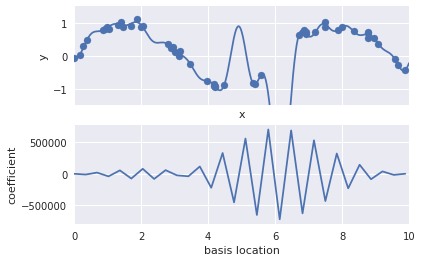

In [14]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 10))
    
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

### Penalize large values
The lower panel of this figure shows the ``amplitude of the basis function at each location``.

This is **typical over-fitting behavior** when basis functions overlap: the coefficients of adjacent basis functions blow up and cancel each other out.

We know that such behavior is problematic, and ``it would be nice if we could limit such spikes expliticly in the model by`` **penalizing large values** ``of the model parameters``.

Such a penalty is known as **regularization**, and comes in several forms.

### Ridge regression ($L_2$ Regularization)

Perhaps the most common form of regularization is known as **ridge regression** or $L_2$ **regularization**, sometimes also called *Tikhonov regularization*.

This proceeds by penalizing the sum of squares (2-norms) of the model coefficients; in this case, the penalty on the model fit would be 

$$
P = \alpha\sum_{n=1}^N \theta_n^2
$$

where $\alpha$ is a free parameter that controls the strength of the penalty.


### Ridge regression in Scikit-Learn
This type of penalized model is built into Scikit-Learn with the ``Ridge`` estimator that minimizes the following objective function:
$$\|y - Xw\|^2_2 + \alpha \|w\|^2_2$$
or
$$(y - Xw)^2 + \alpha \sum_{i=1}^N{w^2}$$

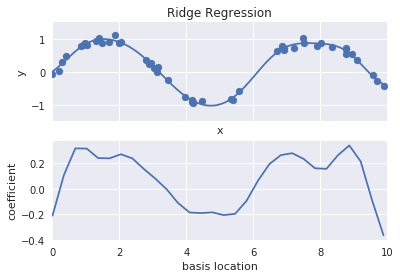

In [165]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

* The $\alpha$ parameter **controls the complexity** of the resulting model.
  * In the limit $\alpha \to 0$, we recover the standard linear regression result; 
  * in the limit $\alpha \to \infty$, all model responses will be suppressed.
* One **advantage of ridge regression** in particular is that 
  * it can be computed **very efficiently**

### Lasso regression ($L_1$ regularization)

Another very common type of regularization is known as lasso, and involves penalizing the sum of absolute values (1-norms) of regression coefficients:
$$
P = \alpha\sum_{n=1}^N |\theta_n|
$$
Though this is conceptually very similar to ridge regression, the results can differ surprisingly: for example, due to geometric reasons lasso regression tends to favor *sparse models* where possible: that is, it preferentially sets model coefficients to exactly zero.



### Lasso regression in Scikit-Learn
The optimization objective for Lasso is:

$$\frac{1}{2 \cdot nsamples}  \|y - Xw\|^2_2 + \alpha \|w\|_1$$

We can see this behavior in duplicating the ridge regression figure, but using L1-normalized coefficients:

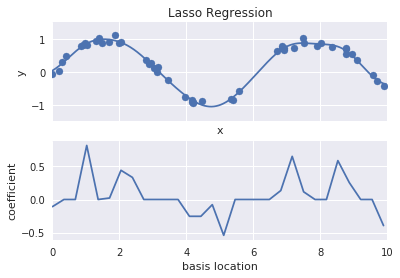

In [16]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001, tol=0.001))
basis_plot(model, title='Lasso Regression')

### Lasso: features
* With the **lasso regression penalty**, the `majority of the coefficients are exactly zero`, with the functional behavior being modeled by a small subset of the available basis functions.
* As with ridge regularization, the $\alpha$ **parameter tunes** the strength of the penalty, and should be determined via, for example, **cross-validation**.

## Learning weights using iterative solutions
* **Stochastic Gradient Descent** (SGD) is a simple yet very efficient approach to learn Regression. 
* Given a set of **training examples** $(x_1, y_1),\dots (x_n, y_n)$, our goal is to **learn** a linear scoring function $f(x)=w^Tx+b$ with model parameters $w\in \mathbf{R}^m$ and intercept $b\in \mathbf{R}$.
* A common choice to find the model parameters is by **minimizing the regularized training error** given by
$$E(w,b)=\frac{1}{n}\sum_{i=1}^n{L(x_i. f(x_i))}+\alpha R(w)$$
where 
* $L$ is a loss function that measures model (mis)fit and 
* $R$ is a regularization term (aka penalty) that penalizes model complexity; 
* $\alpha > 0$ is a non-negative hyperparameter.

### SGD
* SGD approximates the true gradient of $E(w,b)$ by considering a **single training example** at a time.
* SGD iterates over the training examples and **for each example updates the model parameters** according to the update rule given by
$$w \leftarrow w - \eta(\alpha \frac{\partial R(w)}{\partial w} + \frac{\partial L(w^T x_i+b, y_i)}{\partial w}$$
* where $\eta$ is the learning rate which controls the step-size in the parameter space.


<img src="figures/SGD.gif" width="%60">  

## $R^2$ Score
$${R^{2}=1-{\frac {RSS}{TSS}}}$$
* $RSS=\sum _{{i=1}}^{n}(y_{i}-{\hat  {y}}_{i})^{2}$  is the Residual Sum of Squares;
* $TSS=\sum _{{i=1}}^{n}(y_{i}-\overline {y})^{2}$  is the Total Sum of Squares;
  * $y_{i}$  are the observed data
  * $\overline {y}$  the average of observed data
  * ${\hat  {y}}_{i}$  predicted output.

* $R^2=1$ is perfect prediction
* $R^2=0$ means that there is no linear relationship between X and y


## Mean Squared Error (MSE)
$${MSE} ={\frac {1}{n}}\sum _{i=1}^{n}(y_{i}-{\hat {y_{i}}})^{2}$$
* $y_{i}$  are the observed data
* ${\hat  {y}}_{i}$  predicted output.  
* The larger the number the larger the error.

## Error measure in Scikit-learn


In [17]:
from sklearn.metrics import mean_squared_error, r2_score
preds = model.predict(X)
print("R2 score : %.2f" % r2_score(y,preds))
print("Mean squared error: %.2f" % mean_squared_error(y,preds))

ValueError: Found input variables with inconsistent numbers of samples: [50, 100]

## Example: Predicting Bicycle Traffic

<img align="left" style="padding-right:30px;"  src="figures/bicycle-across-Bridge.jpg" width="%60">  
As an example, let's take a look at whether we can ``predict the number of bicycle trips across Seattle's Fremont Bridge`` based on weather, season, and other factors.

### Task
* We will try to determine the extent to which weather and seasonal factors—temperature, precipitation, and daylight hours—affect the volume of bicycle traffic through this corridor.

* The NOAA makes available their daily [weather station data](http://www.ncdc.noaa.gov/cdo-web/search?datasetid=GHCND) (station ID USW00024233).

We will perform a **simple linear regression to relate weather and other information to bicycle counts**, in order to estimate how a change in any one of these parameters affects the number of riders on a given day.


Let's start by loading the two datasets, indexing by date:

In [18]:
#!curl -o data/FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

In [19]:
import pandas as pd
counts = pd.read_csv('data/FremontBridge.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('data/BicycleWeather.csv', index_col='DATE', parse_dates=True)

Next we will compute the **total daily bicycle traffic**, and put this in its own dataframe:

In [20]:
# Resample time-series data.
daily = counts.resample('d').sum() # counts must have a datetime-like index
# If you want to do a row sum in pandas, given the dataframe df:
# df.sum(axis=1)
# and a column sum:
# df.sum(axis=0)
daily['Total'] = daily.sum(axis=1)
print(daily.head())
daily = daily[['Total']] # remove other columns

            Fremont Bridge East Sidewalk  Fremont Bridge West Sidewalk   Total
Date                                                                          
2012-10-03                        1760.0                        1761.0  3521.0
2012-10-04                        1708.0                        1767.0  3475.0
2012-10-05                        1558.0                        1590.0  3148.0
2012-10-06                        1080.0                         926.0  2006.0
2012-10-07                        1191.0                         951.0  2142.0


* We saw previously that the patterns of use generally **vary from day to day**; 
* let's account for this in our data by adding binary columns that **indicate the day of the week**:

In [21]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

* Similarly, we might expect riders to behave differently on **holidays**; 
* let's add an indicator of this as well:

In [22]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True) # Fill NA/NaN values using the 0.
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday
Date,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


We also might suspect that the **hours of daylight would affect how many people ride**; 

let's use the standard astronomical calculation to add this information:

(8, 17)

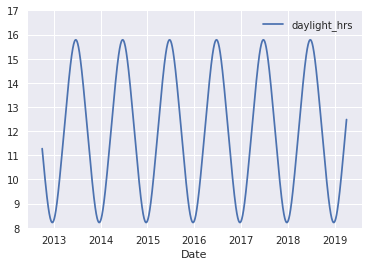

In [23]:
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot()
plt.ylim(8, 17)

We can also **add** 
* the **average temperature** and 
* **total precipitation** to the data.
* a **flag** that indicates whether a **day is dry** (has zero precipitation):

In [24]:
# temperatures are in 1/10 deg C; convert to C
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

# precip is in 1/10 mm; convert to inches
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)

daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])

Finally, let's **add a counter** that increases from day 1, and measures how many years have passed.

This will let us measure any observed annual increase or decrease in daily crossings:

In [25]:
daily['annual'] = (daily.index - daily.index[0]).days / 365.

Now our data is in order, and we can take a look at it:

In [26]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,13.35,1.0,0.000000
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,13.60,1.0,0.002740
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,15.30,1.0,0.005479
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,15.85,1.0,0.008219
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,15.85,1.0,0.010959


With this in place, we can 
* **choose the columns** to use, and 
* **fit a linear regression** model to our data.  

We will set ``fit_intercept = False``, because the daily flags essentially operate as their own day-specific intercepts:

In [27]:
# Drop any rows with null values
daily.dropna(axis=0, how='any', inplace=True)

column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
                'daylight_hrs', 'PRCP', 'dry day', 'Temp (C)', 'annual']
X = daily[column_names]
y = daily['Total']

model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)

print("linear regression train score:", model.score(X, y))

linear regression train score: 0.8675358719950574


Finally, we can compare the total and predicted bicycle traffic visually:

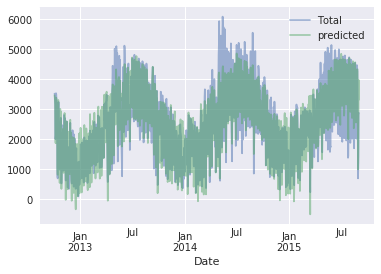

In [28]:
daily[['Total', 'predicted']].plot(alpha=0.5);

It is evident that we have **missed some key features**, especially during the **summer time**.

* Either our `features are not complete` (i.e., people decide whether to ride to work based on more than just these) or 
* there are some **nonlinear relationships** that we have failed to take into account (e.g., perhaps **people ride less at both high and low temperatures**).

Nevertheless, our rough approximation is enough to **give us some insights**, and we can **take a look at the coefficients** of the linear model to estimate how much each feature contributes to the daily bicycle count:

In [29]:
params = pd.Series(model.coef_, index=X.columns)
params

Mon              504.882756
Tue              610.233936
Wed              592.673642
Thu              482.358115
Fri              177.980345
Sat            -1103.301710
Sun            -1133.567246
holiday        -1187.401381
daylight_hrs     128.851511
PRCP            -664.834882
dry day          547.698592
Temp (C)          65.162791
annual            26.942713
dtype: float64

* These numbers are **difficult to interpret** without some measure of their **uncertainty**.
* We can compute these uncertainties quickly using **bootstrap resamplings** of the data:

In [30]:
from sklearn.utils import resample
np.random.seed(1)
err = np.std([model.fit(*resample(X, y)).coef_
              for i in range(1000)], 0)

With these errors estimated, let's again look at the results:

In [31]:
print(pd.DataFrame({'effect': params.round(0),
                    'error': err.round(0)}))

              effect  error
Mon            505.0   86.0
Tue            610.0   83.0
Wed            593.0   83.0
Thu            482.0   85.0
Fri            178.0   81.0
Sat          -1103.0   80.0
Sun          -1134.0   83.0
holiday      -1187.0  163.0
daylight_hrs   129.0    9.0
PRCP          -665.0   62.0
dry day        548.0   33.0
Temp (C)        65.0    4.0
annual          27.0   18.0


We first see that there is a relatively stable trend in the weekly baseline: 
* there are **many more riders on weekdays** than on weekends and holidays.

* We see that for each additional hour of **daylight**, 129 ± 9 more people choose to ride; 
* a **temperature** increase of one degree Celsius encourages 65 ± 4 people to grab their bicycle; 
* a **dry day** means an average of 548 ± 33 more riders, and 
* each inch of **precipitation** means 665 ± 62 more people leave their bike at home.

Once all these effects are accounted for, we see a modest increase of 27 ± 18 new daily riders each year.

### Missing information
Our model is almost certainly missing some relevant information. <br>
For example, 
* **nonlinear effects** (such as effects of precipitation *and* cold temperature) and 
* **nonlinear trends** within each variable (such as disinclination to ride at very cold and very hot temperatures) cannot be accounted for in this model.
Additionally, 
* we have thrown away some of the **finer-grained information** (such as the difference between a rainy morning and a rainy afternoon), and 
* we have ignored correlations between days (such as the possible effect of a rainy Tuesday on Wednesday's numbers, or the effect of an unexpected sunny day after a streak of rainy days).

These are all potentially interesting effects, and you now have the tools to begin exploring them if you wish!

<div class="alert alert-success">
    
## Practice 
* Divide the dataset into training and test
* Try to add at least one of the missing information listed above
* Compare the LinearRegression with the analyzed regression models (Lasso, Ridge, Polynomial basis function, Gaussian basis function ...)

</div>

In [261]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

# Drop any rows with null values
daily.dropna(axis=0, how='any', inplace=True)
column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday','daylight_hrs', 'PRCP', 'dry day', 'Temp (C)', 'annual']
X = daily[column_names]
y = daily['Total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)
print("Linear regression train score:", model.score(X_test, y_test))

poly_model = make_pipeline(PolynomialFeatures(2), LinearRegression())
poly_model.fit(X_train, y_train)
print("Polynomial regression train score:", poly_model.score(X_test, y_test))

model_L2 = make_pipeline(PolynomialFeatures(2), Ridge(alpha=0.1))
model_L2.fit(X_train, y_train)
print("Polynomial L2 regularized regression train score:", model_L2.score(X_test, y_test))


model_L1 = make_pipeline(PolynomialFeatures(2), Lasso(alpha=0.1))
model_L1.fit(X_train, y_train)
L1_predicitons = model_L1.predict(X_test)
print("Polynomial L1 regularized regression train score:", model_L1.score(X_test, y_test))





Linear regression train score: 0.8505945011435486
Polynomial regression train score: 0.8085900340457866
Polynomial L2 regularized regression train score: 0.8798424982331565
Polynomial L1 regularized regression train score: 0.8804937545868837


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
